---
title: "Factors influencing pH"
author: "cciscato"
date: "15/02/2023"
format: 
  html:
    embed-resources: true
    theme:
              light: flatly
              dark: darkly
    toc: true
    code-fold: true
execute:
  warning: false
jupyter: python3
---

In [30]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [31]:
import plotly.graph_objects as go
import plotly.express as px

In [32]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

### pH as a function of Alkalinity - Baseline

In [45]:
alk_baseline = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/ALK_baseline_ensemble1_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [46]:
ph_baseline = xr.open_mfdataset('/Volumes/UnionSine/data_transfer/ssp126/ph_base/*.nc')

In [47]:
sliced_alk_baseline = alk_baseline.where((-25 < alk_baseline.nav_lon) & (alk_baseline.nav_lon < 10) & (35 < alk_baseline.nav_lat) & (alk_baseline.nav_lat < 70), drop=True)

In [48]:
sliced_ph_baseline = ph_baseline.where((-25 < ph_baseline.nav_lon) & (ph_baseline.nav_lon < 10) & (35 < ph_baseline.nav_lat) & (ph_baseline.nav_lat < 70), drop=True)

In [53]:
start_date = "2080-01-01"
end_date = "2100-01-01"

alk_frame_baseline = sliced_alk_baseline.sel(time_counter=slice(start_date, end_date))
alk_frame_baseline = alk_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))

In [54]:
start_date = "2080-01-01"
end_date = "2100-01-01"

ph_frame_baseline = sliced_ph_baseline.sel(time_counter=slice(start_date, end_date))
ph_frame_baseline = ph_frame_baseline.ph.mean(dim=('y', 'x'))

In [55]:
alk_frame_baseline = alk_frame_baseline.to_dataframe('ALK')
ph_frame_baseline = ph_frame_baseline.to_dataframe('ph')

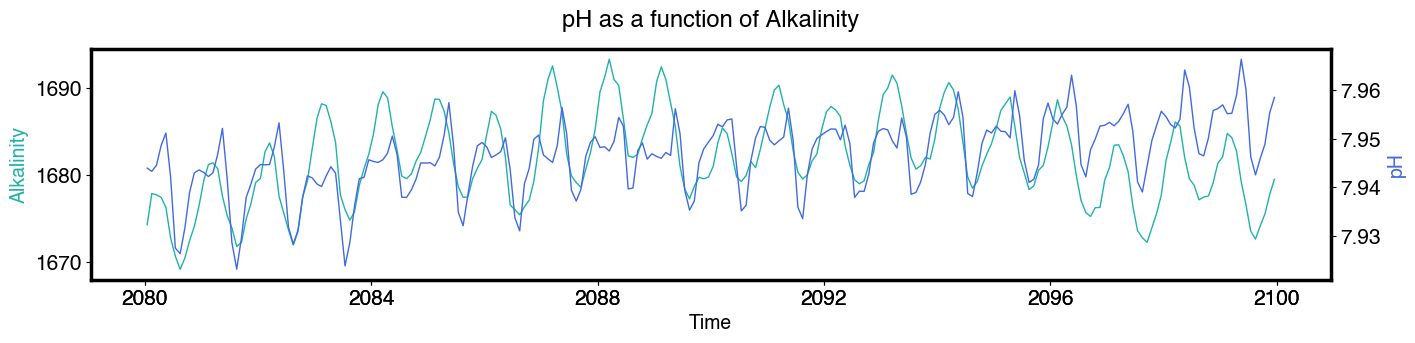

In [56]:
fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_baseline.index, alk_frame_baseline.ALK, linewidth=1, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity', fontsize=14, color="lightseagreen")

ax2.plot(ph_frame_baseline.index, ph_frame_baseline.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14, color="royalblue") 

plt.xlabel("Time", fontsize=14)

plt.title('pH as a function of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### pH as a function of Alkalinity - OAE

In [33]:
alk_oae = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/ALK_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [34]:
ph_oae = xr.open_mfdataset('/Volumes/UnionSine/data_transfer/ssp126/ph_oae/*.nc')

In [35]:
sliced_alk_oae = alk_oae.where((-25 < alk_oae.nav_lon) & (alk_oae.nav_lon < 10) & (35 < alk_oae.nav_lat) & (alk_oae.nav_lat < 70), drop=True)

In [36]:
sliced_ph_oae = ph_oae.where((-25 < ph_oae.nav_lon) & (ph_oae.nav_lon < 10) & (35 < ph_oae.nav_lat) & (ph_oae.nav_lat < 70), drop=True)

In [57]:
start_date = "2080-01-01"
end_date = "2100-01-01"

alk_frame_oae = sliced_alk_oae.sel(time_counter=slice(start_date, end_date))
alk_frame_oae = alk_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [58]:
start_date = "2080-01-01"
end_date = "2100-01-01"

ph_frame_oae = sliced_ph_oae.sel(time_counter=slice(start_date, end_date))
ph_frame_oae = ph_frame_oae.ph.mean(dim=('y', 'x'))

In [59]:
alk_frame_oae = alk_frame_oae.to_dataframe('ALK')
ph_frame_oae = ph_frame_oae.to_dataframe('ph')

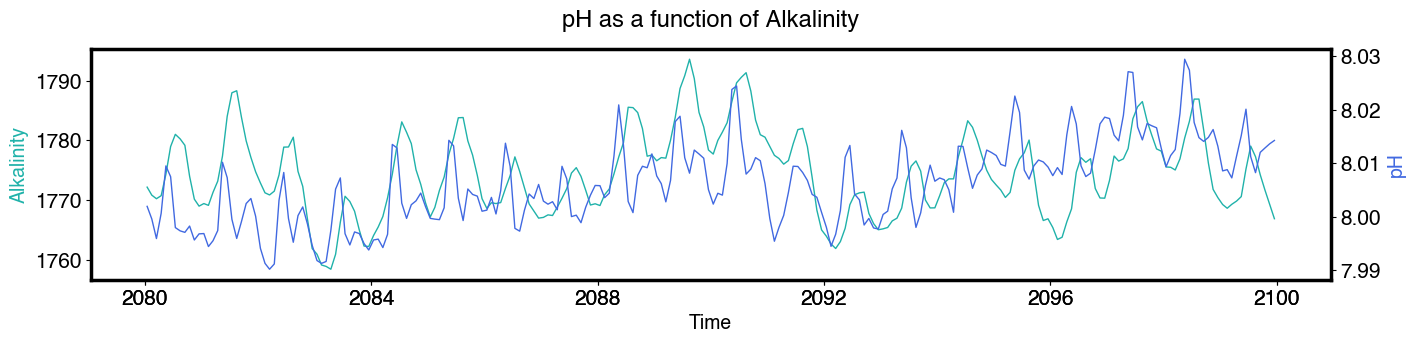

In [60]:
fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_oae.index, alk_frame_oae.ALK, linewidth=1, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity', fontsize=14, color="lightseagreen")

ax2.plot(ph_frame_oae.index, ph_frame_oae.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14, color="royalblue") 

plt.xlabel("Time", fontsize=14)

plt.title('pH as a function of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### pH as a function of CO2 Flux - Baseline

In [67]:
co2flux_baseline = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/CO2flux_baseline_ensemble1_ssp126_1m.nc')

In [68]:
sliced_co2flux_baseline = co2flux_baseline.where((-25 < co2flux_baseline.nav_lon) & (co2flux_baseline.nav_lon < 10) & (35 < co2flux_baseline.nav_lat) & (co2flux_baseline.nav_lat < 70), drop=True)

In [69]:
start_date = "2080-01-01"
end_date = "2100-01-01"

co2flux_frame_baseline = sliced_co2flux_baseline.sel(time_counter=slice(start_date, end_date))
co2flux_frame_baseline = co2flux_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))

In [70]:
co2flux_frame_baseline = co2flux_frame_baseline.to_dataframe('co2flux_cpl')

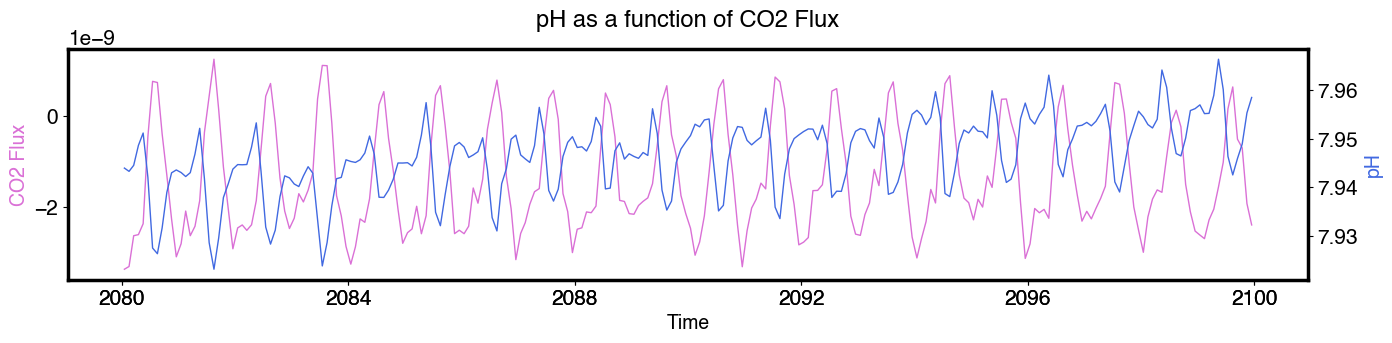

In [71]:
fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax.set_ylabel('CO2 Flux', fontsize=14, color="orchid")

ax2.plot(ph_frame_baseline.index, ph_frame_baseline.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14, color="royalblue") 

plt.xlabel("Time", fontsize=14)

plt.title('pH as a function of CO2 Flux', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### pH as a function of CO2 Flux - OAE

In [65]:
co2flux_oae = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/CO2flux_CDR_EU_coast_ssp126_1m.nc')

In [42]:
sliced_co2flux_oae = co2flux_oae.where((-25 < co2flux_oae.nav_lon) & (co2flux_oae.nav_lon < 10) & (35 < co2flux_oae.nav_lat) & (co2flux_oae.nav_lat < 70), drop=True)

In [61]:
start_date = "2080-01-01"
end_date = "2100-01-01"

co2flux_frame_oae = sliced_co2flux_oae.sel(time_counter=slice(start_date, end_date))
co2flux_frame_oae = co2flux_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [62]:
co2flux_frame_oae = co2flux_frame_oae.to_dataframe('co2flux_cpl')

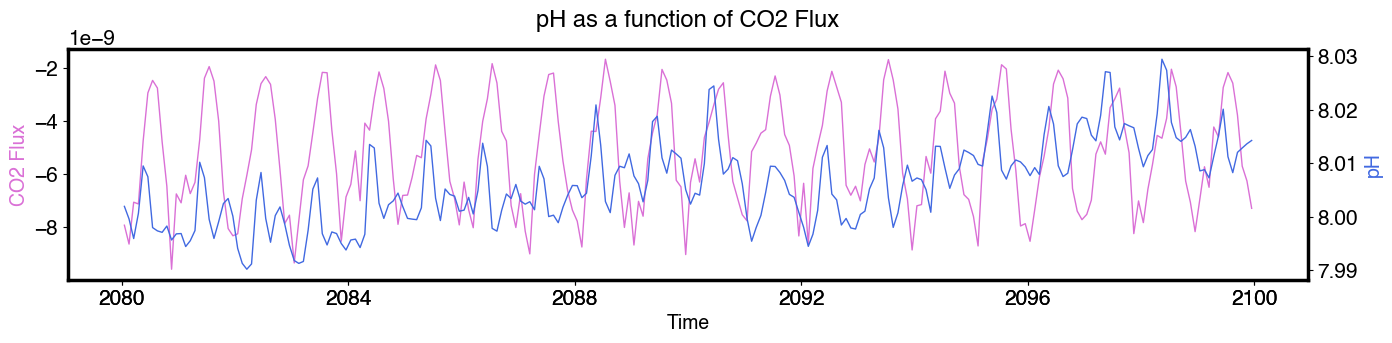

In [63]:
fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux_cpl, linewidth=1, color="orchid", label = 'CO2 Flux')
ax.set_ylabel('CO2 Flux', fontsize=14, color="orchid")

ax2.plot(ph_frame_oae.index, ph_frame_oae.ph, linewidth=1, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14, color="royalblue") 

plt.xlabel("Time", fontsize=14)

plt.title('pH as a function of CO2 Flux', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()